# Explore here

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [1]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os



In [2]:
os.getcwd()

'/workspaces/Arboles_/src'

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.duplicated().sum()

0

In [5]:
sum(data.isnull().sum())

0

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 640x480 with 0 Axes>

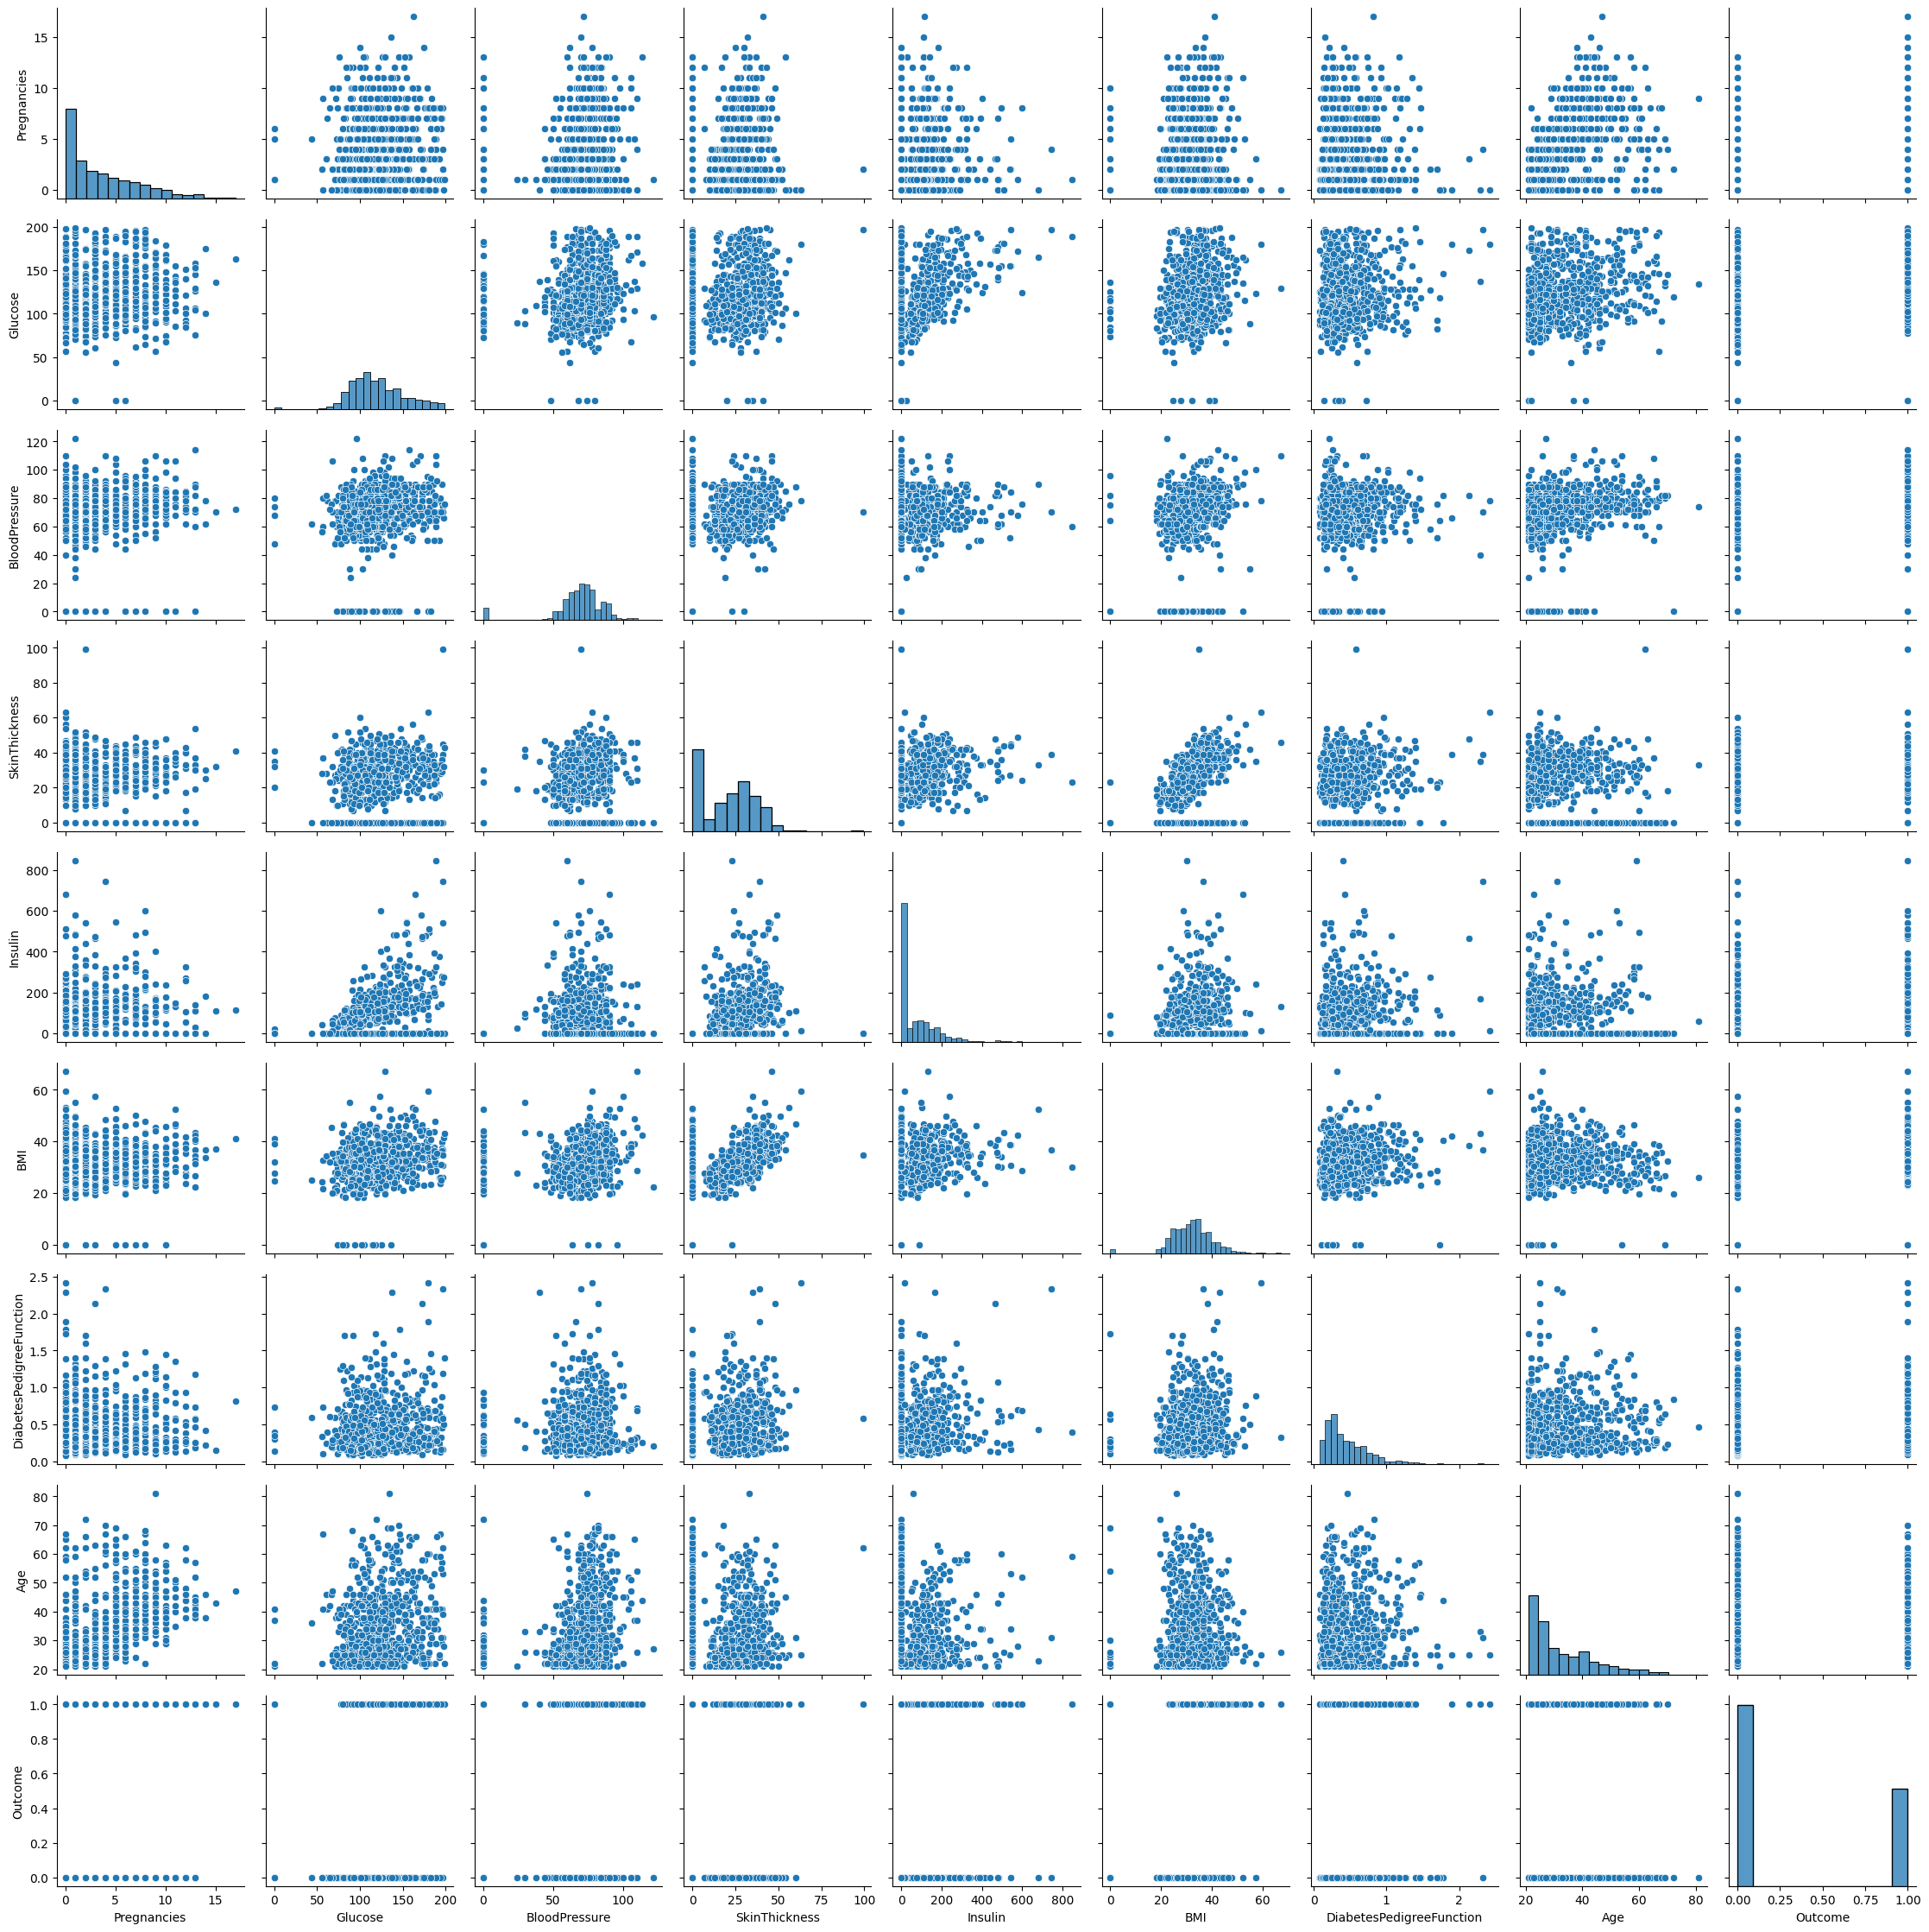

In [11]:

plt.suptitle("Relación Entre Variables", y=1.02)
pairplot = sns.pairplot(data)
plt.tight_layout()
plt.show()

Escalado de Datos solo para plotear.

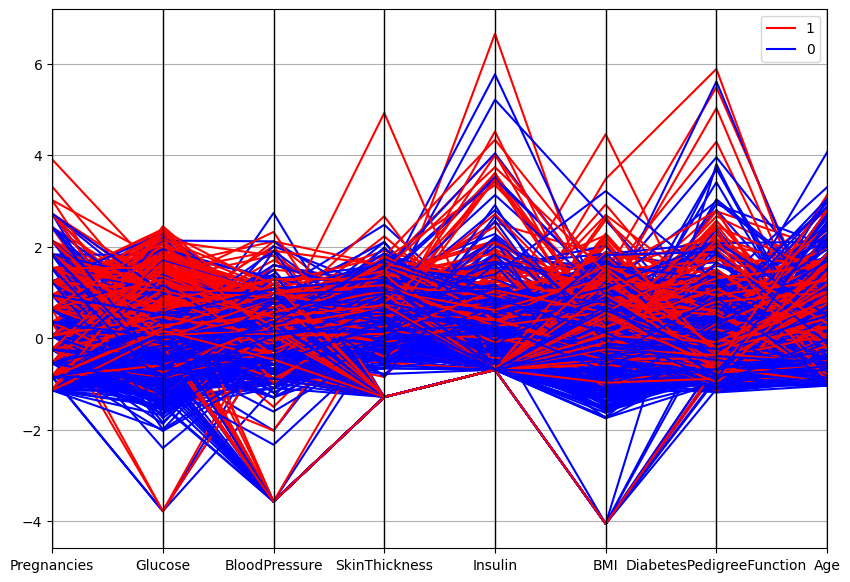

In [12]:

scaler = StandardScaler()

vars = data.drop("Outcome", axis=1)

sc_vars = scaler.fit_transform(vars)


sc_data = pd.DataFrame(sc_vars, columns=vars.columns)
sc_data["Outcome"] = data["Outcome"]

# Plot paralelo
plt.figure(figsize=(10, 7))
parallel_coordinates(sc_data, "Outcome", color=["red", "blue"])
plt.show()

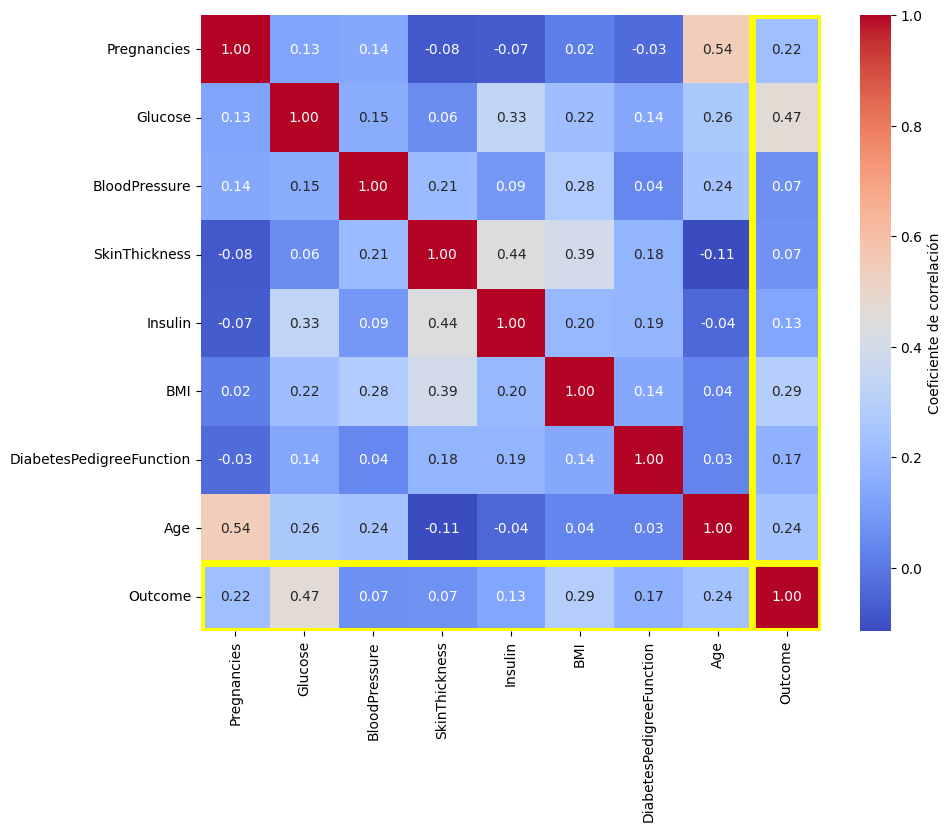

In [13]:


def corr_highlighted_target(dataframe, target):
    corr = dataframe.corr()
    # Generar el mapa de calor de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de correlación'})

    # Resaltar la columna y fila de la variable objetivo
    # Encontrar el índice de la variable objetivo en las columnas
    target_index = dataframe.columns.tolist().index(target)

    # Cambiar el color de la columna y fila correspondiente a la variable objetivo // (gracias chat gpt )
    plt.gca().add_patch(plt.Rectangle((target_index, 0), 1, len(corr), fill=False, edgecolor='yellow', lw=5))
    plt.gca().add_patch(plt.Rectangle((0, target_index), len(corr), 1, fill=False, edgecolor='yellow', lw=5))

    plt.show()

corr_highlighted_target(data, 'Outcome')

In [14]:
corr = data.corr()
corr.Outcome

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [15]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: Glucose, Importance: 24.112559854984283
Feature: BMI, Importance: 17.068248987197876
Feature: Age, Importance: 16.874344646930695
Feature: Insulin, Importance: 10.67257672548294
Feature: DiabetesPedigreeFunction, Importance: 9.550216794013977
Feature: BloodPressure, Importance: 9.20177474617958
Feature: SkinThickness, Importance: 7.993954420089722
Feature: Pregnancies, Importance: 4.5263271778821945


In [17]:
    
ls_vars_low_corr = corr[corr['Outcome'].abs() <= 0.15].index
[x for x in ls_vars_low_corr if sorted_feature_importance[x] <= 0.1]


['BloodPressure', 'SkinThickness']

In [18]:
selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)


X_train_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.304,21.0
1,9.0,112.0,0.0,28.2,1.282,50.0
2,1.0,139.0,83.0,28.7,0.654,22.0
3,0.0,161.0,0.0,21.9,0.254,65.0
4,6.0,134.0,370.0,46.2,0.238,46.0


In [19]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Tras aplicar el EDA la selección de características, tanto con SelecrKBest como con la correlación + XGBRegressor, decido quedarme eliminar las variables 
['BloodPressure', 'SkinThickness']

In [20]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

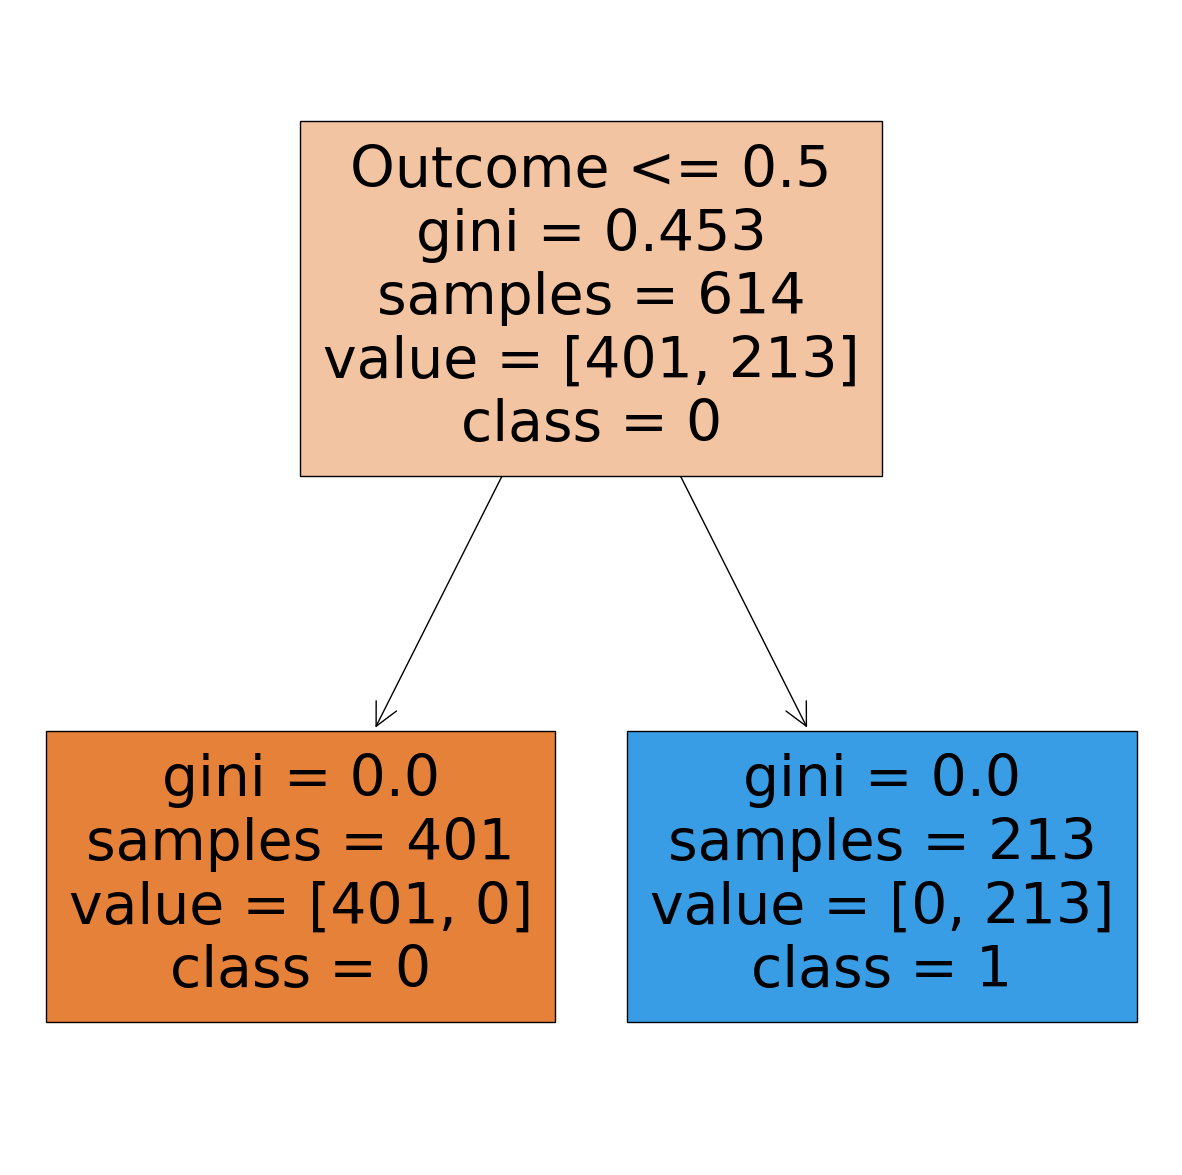

In [21]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [22]:
y_hat = model.predict(X_test_sel)
accuracy_score(y_test, y_hat)


1.0

|Búsqueda de Hiperparámetros| 
-----------------------

In [23]:
hp_dic = {'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None], 
    'splitter': ['best', 'random']}

random_search= RandomizedSearchCV(estimator=model,param_distributions=hp_dic, n_iter=100, cv=5, random_state=10, n_jobs=1, scoring='f1', verbose=1 )
random_search.fit(X_train_sel, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f69dfda73a0>,
                                        'max_features': [None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f69e783f880>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f69e7823190>,
                                        'splitter': ['best', 'random']},
                   random_state=10, scoring='f1', verbose=1)

In [24]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'splitter': 'random'}

In [25]:
model_hp = DecisionTreeClassifier(random_state = 42, criterion='log_loss', max_depth=4 , max_features=None , min_samples_leaf=19 , min_samples_split= 15, splitter='best')
model_hp.fit(X_train_sel, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, min_samples_leaf=19,
                       min_samples_split=15, random_state=42)

In [26]:
y_pred = model_hp.predict(X_test_sel)

In [27]:
accuracy_score(y_test, y_pred)

1.0

¿Bajó el rendimiento?

In [28]:
y_pred = model.predict(X_train_sel)
accuracy = accuracy_score(y_train, y_pred)
print("Precisión en los datos de entrenamiento:", accuracy*100, "%")

Precisión en los datos de entrenamiento: 100.0 %


Hay un sobreajuste sobre los datos de entrenamiento, por lo que el modelo no está capturando las relaciones subyacentes en los datos sino memorizando el conjunto de train.